# About the dataset




The provided context outlines the global challenge of feeding an anticipated population growth from 7.3 billion to 9.7 billion by 2050. Addressing this challenge has become a key focus for various entities, including food and agriculture organizations, entrepreneurs, and philanthropists. The solutions discussed range from altering agricultural practices to modifying dietary habits. Complicating this issue is the impact of climate change on food production. The dataset, sourced from the Food and Agriculture Organization of the United Nations, offers insights into worldwide food production, particularly comparing food intended for human consumption with that intended for animal feed. The dataset's attributes include country codes, names, food items, elements (food or feed), geographic coordinates, and annual production quantities. The dataset, last updated in 2013, is part of the Food Balance Sheets and provides a comprehensive overview of a country's food supply during a specific reference period. The exploration of this dataset is conducted through a pandas and seaborn-based exploratory notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# importing data
df = pd.read_csv("../input/FAO.csv",  encoding = "ISO-8859-1")
pd.options.mode.chained_assignment = None

Let's see what the data looks like...

In [3]:
df.head ()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


# Plot for annual produce of different countries with quantity in y-axis and years in x-axis

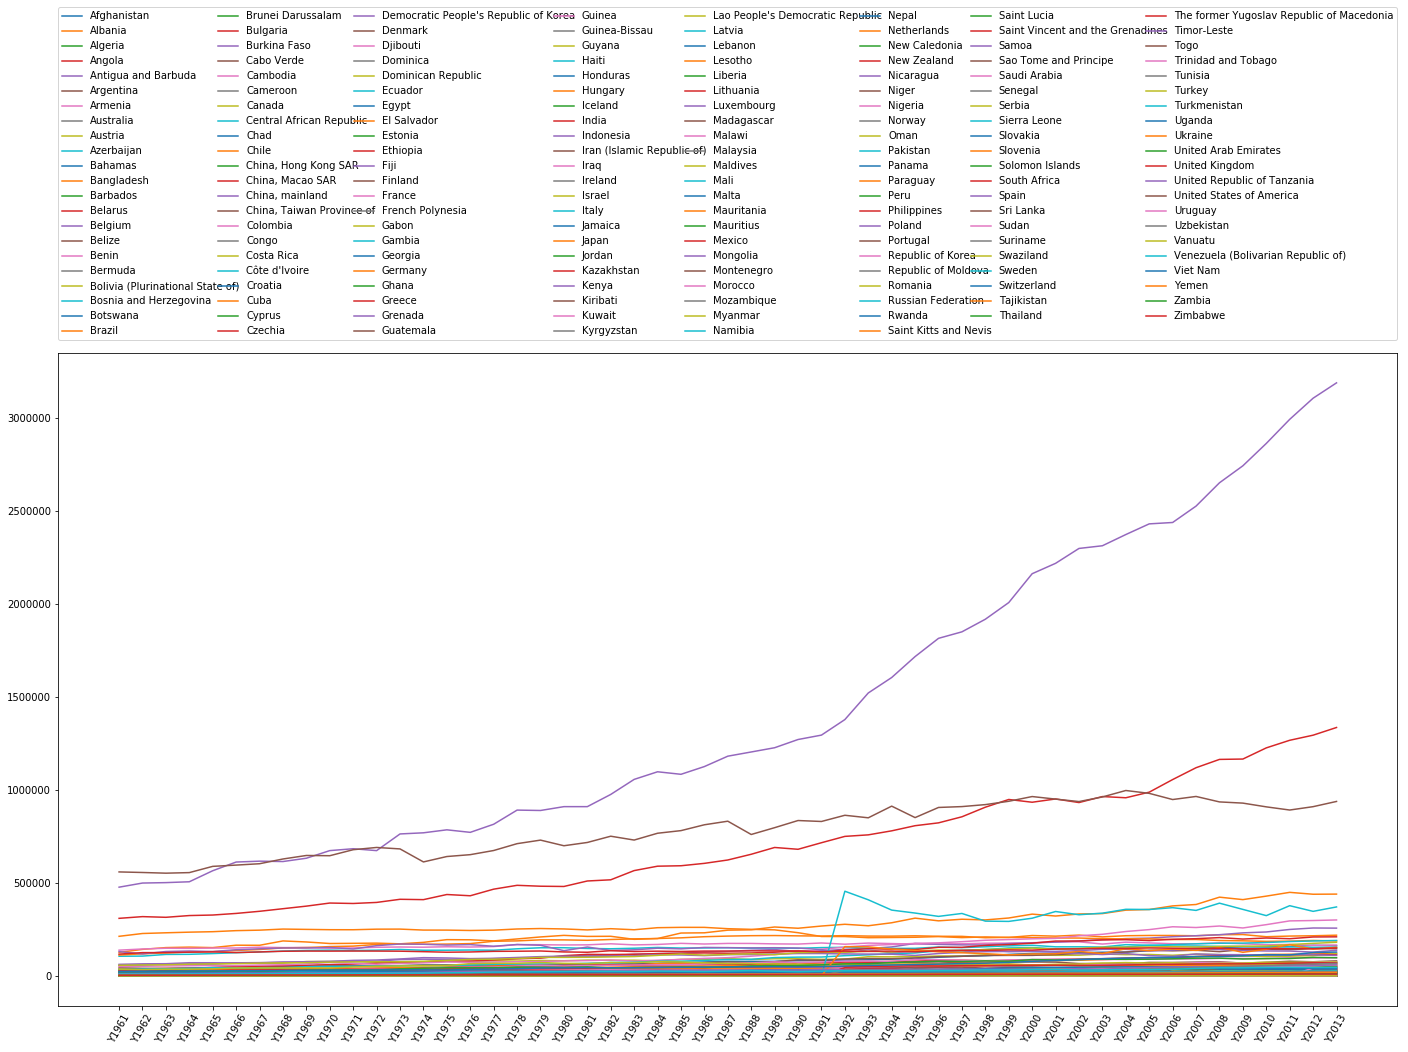

In [4]:
area_list = list(df("Area").unique())
year_list = list(df.iloc[:,10:].columns)
  for ar in area_list :
        yearly_produce = []
        for yr in year_list :
            yearly_produce.append(df["year"],df["area"] == ar.sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

Clearly, China, India and US stand out here. So, these are the countries with most food and feed production.

Now, let's have a close look at their food and feed data

# Food and feed plot for the whole dataset

<function matplotlib.pyplot.show>

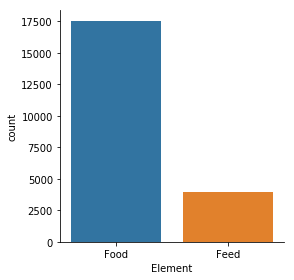

In [9]:
sns.factorplot("Element" ,data = df ,kind = "count")
plt.show

So, there is a huge difference in food and feed production. Now, we have obvious assumptions about the following plots after looking at this huge difference.

# Food and feed plot for the largest producers(India, USA, China)

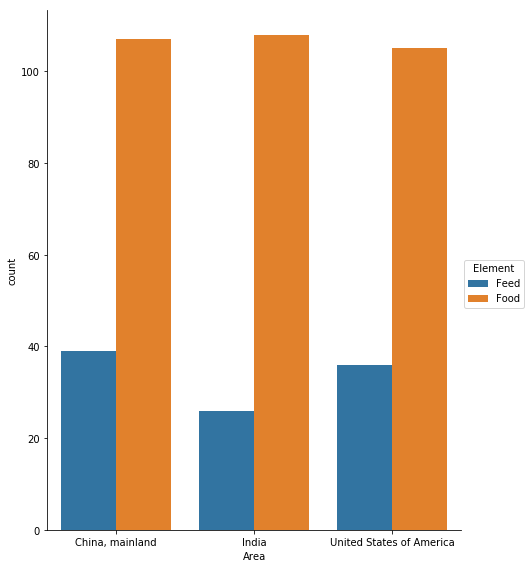

In [8]:
sns.factorplot("Area",data )

Though, there is a huge difference between feed and food production, these countries' total production and their ranks depend on feed production.

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [ ]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

Now, this is not perfect so we transpose this dataframe and add column names.

In [ ]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

Perfect! Now, we will do some feature engineering.

# First, a new column which indicates mean produce of each state over the given years. Second, a ranking column which ranks countries on the basis of mean produce.

In [1]:
mean_produce =  []
for i in range (174) :
    mean_produce.append(new_df.iloc[i,:].values.mean())
    
    new_df("Mean_produce") = mean_produce
    
    new_df("Rank") = new_df("Mean_produce").rank(ascending = False)
    
    new_df.head

SyntaxError: can't assign to function call (<ipython-input-1-1cf7ca8d0392>, line 5)

Now, we create another dataframe with items and their total production each year from 1961 to 2013

In [ ]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce


In [ ]:
item_df.head()

# Some more feature engineering

This time, we will use the new features to get some good conclusions.

# 1. Total amount of item produced from 1961 to 2013
# 2. Providing a rank to the items to know the most produced item

In [ ]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

# Now, we find the most produced food items in the last half-century

In [ ]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values()

So, cereals, fruits and maize are the most produced items in the last 50 years

# Food and feed plot for most produced items 

In [ ]:
sns.factorplot("Item", data=df[(df['Item']=='Wheat and products') | (df['Item']=='Rice (Milled Equivalent)') | (df['Item']=='Maize and products') | (df['Item']=='Potatoes and products') | (df['Item']=='Vegetables, Other') | (df['Item']=='Milk - Excluding Butter') | (df['Item']=='Cereals - Excluding Beer') | (df['Item']=='Starchy Roots') | (df['Item']=='Vegetables') | (df['Item']=='Fruits - Excluding Wine')], kind="count", hue="Element", size=20, aspect=.8)
plt.show()

# Now, we plot a heatmap of correlation of produce in difference years

In [ ]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax)

So, we gather that a given year's production is more similar to its immediate previous and immediate following years.

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
ax1.set(xlabel='Y1968', ylabel='Y1961')
ax2.set(xlabel='Y1968', ylabel='Y1963')
ax3.set(xlabel='Y1968', ylabel='Y1986')
ax4.set(xlabel='Y1968', ylabel='Y2013')
sns.jointplot(x="Y1968", y="Y1961", data=df, kind="reg", ax=ax1)
sns.jointplot(x="Y1968", y="Y1963", data=df, kind="reg", ax=ax2)
sns.jointplot(x="Y1968", y="Y1986", data=df, kind="reg", ax=ax3)
sns.jointplot(x="Y1968", y="Y2013", data=df, kind="reg", ax=ax4)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

# Heatmap of production of food items over years

This will detect the items whose production has drastically increased over the years

In [ ]:
new_item_df = item_df.drop(["Item_Name","Sum","Production_Rank"], axis = 1)
fig, ax = plt.subplots(figsize=(12,24))
sns.heatmap(new_item_df,ax=ax)
ax.set_yticklabels(item_df.Item_Name.values[::-1])
plt.show()

There is considerable growth in production of Palmkernel oil, Meat/Aquatic animals, ricebran oil, cottonseed, seafood, offals, roots, poultry meat, mutton, bear, cocoa, coffee and soyabean oil.
There has been exceptional growth in production of onions, cream, sugar crops, treenuts, butter/ghee and to some extent starchy roots.

Now, we look at clustering.

# What is clustering?
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

# Today, we will form clusters to classify countries based on productivity scale

For this, we will use k-means clustering algorithm.
# K-means clustering
(Source [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm) )
![http://gdurl.com/5BbP](http://gdurl.com/5BbP)

This is the data we will use.

In [ ]:
new_df.head()

In [ ]:
X = new_df.iloc[:,:-2].values

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = year_list

# Elbow method to select number of clusters
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As the elbow corner coincides with x=2, we will have to form **2 clusters**. Personally, I would have liked to select 3 to 4 clusters. But trust me, only selecting 2 clusters can lead to best results.
Now, we apply k-means algorithm.

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

Now, let's visualize the results.

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()

So, the blue cluster represents China(Mainland), USA and India while the red cluster represents all the other countries.
This result was highly probable. Just take a look at the plot of cell 3 above. See how China, USA and India stand out. That has been observed here in clustering too.

You should try this algorithm for 3 or 4 clusters. Looking at the distribution, you will realise why 2 clusters is the best choice for the given data

This is not the end! More is yet to come.